## **Import Libraries**

In [ ]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder


import warnings
warnings.filterwarnings('ignore')


#**Load Dataset**


In [ ]:
df = pd.read_csv("/content/Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#**Data Preparation**

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#Checking Duplicates
print(df.duplicated (). value_counts())
df.drop_duplicates(inplace=True)
print(len(df))


False    1470
Name: count, dtype: int64
1470


In [ ]:
#checking missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
print(df.columns)


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


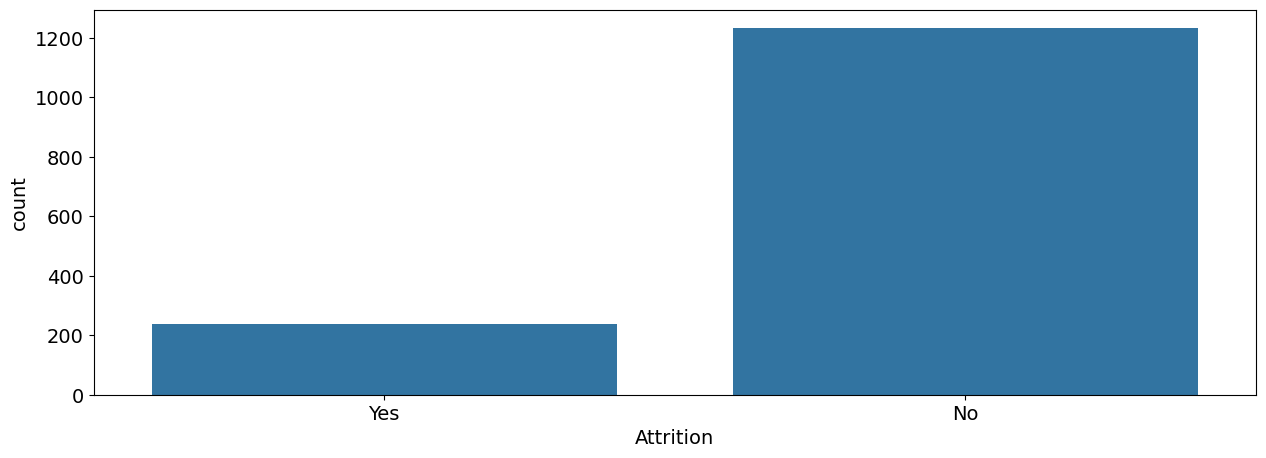

In [ ]:
#Target Variable
plt.figure(figsize=(15,5))
plt.rc("font",size=14)
sns.countplot(x='Attrition',data=df)
plt.show()

## Exploratory Data Analysis

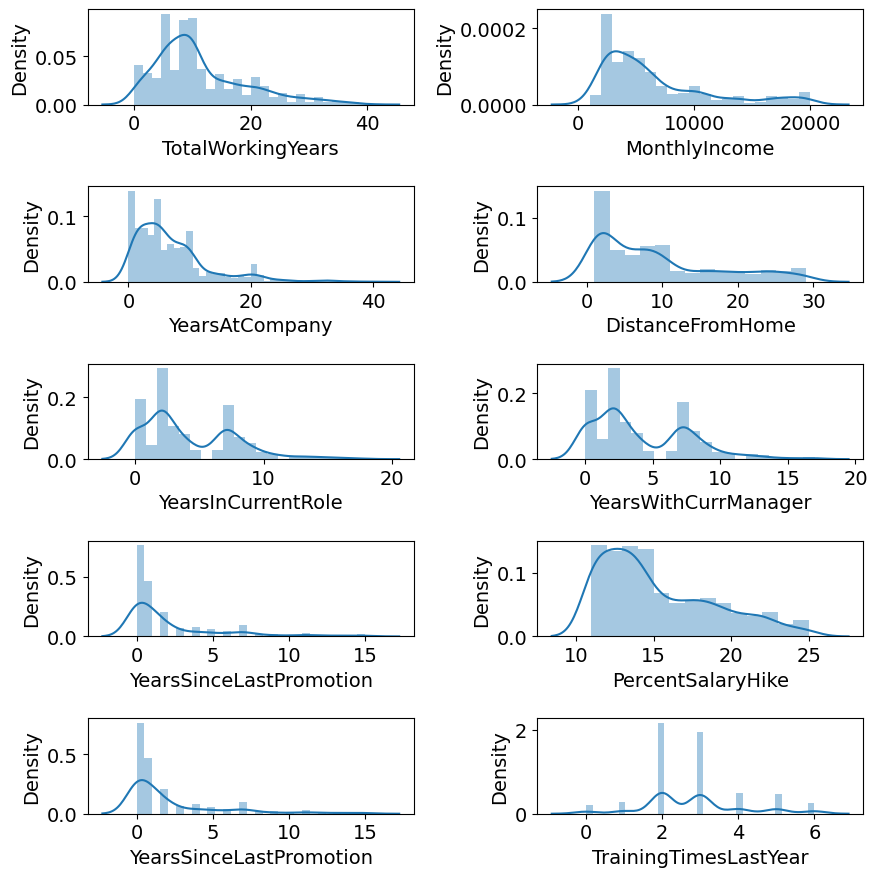

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
# Creating subplots
fig,ax = plt.subplots(5,2, figsize=(9,9))
# Plotting each distribution
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0])
sns.distplot(df['MonthlyIncome'], ax = ax[0,1])
sns.distplot(df['YearsAtCompany'], ax = ax[1,0])
sns.distplot(df['DistanceFromHome'], ax = ax[1,1])
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0])
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1])
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0])
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1])
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0])
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1])

plt.tight_layout()
plt.show()

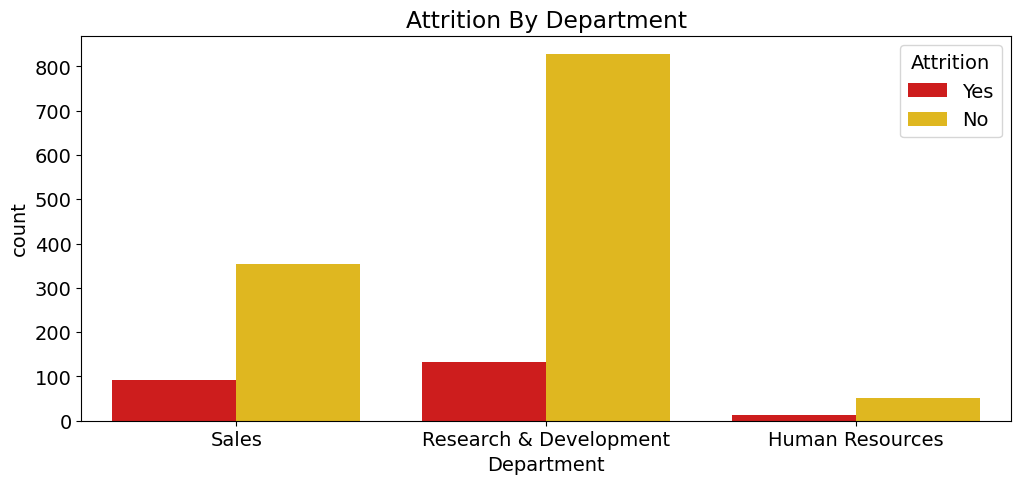

In [ ]:
#Exploratory Data Analysis
plt.figure(figsize=(12,5))
sns.countplot(x=df['Department'], hue=df['Attrition'], palette='hot')
plt.title("Attrition By Department")
plt.show()

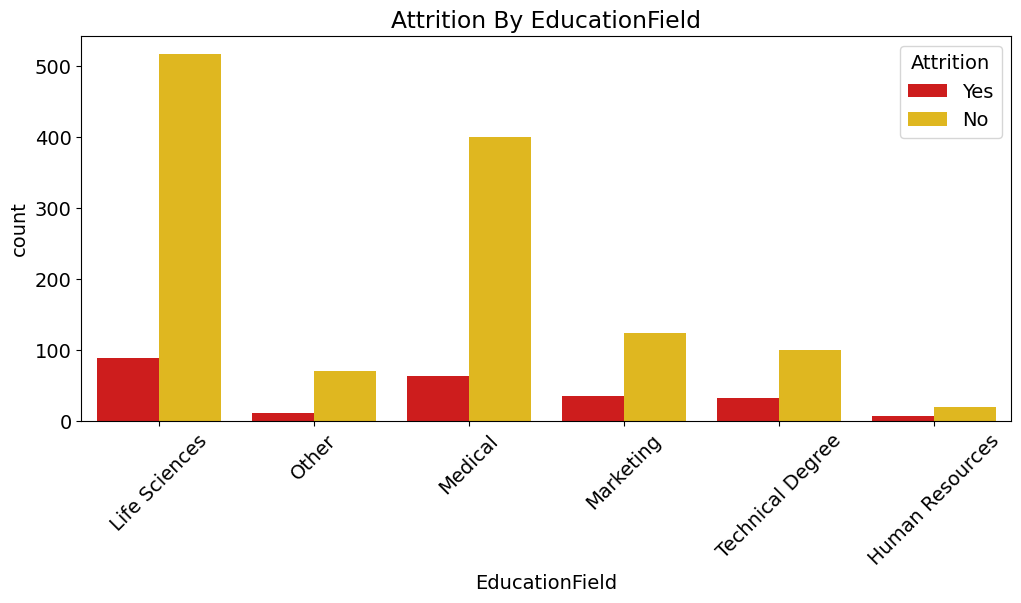

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='EducationField',hue='Attrition', data=df, palette='hot')
plt.title("Attrition By EducationField")
plt.xticks(rotation=45)
plt.show()

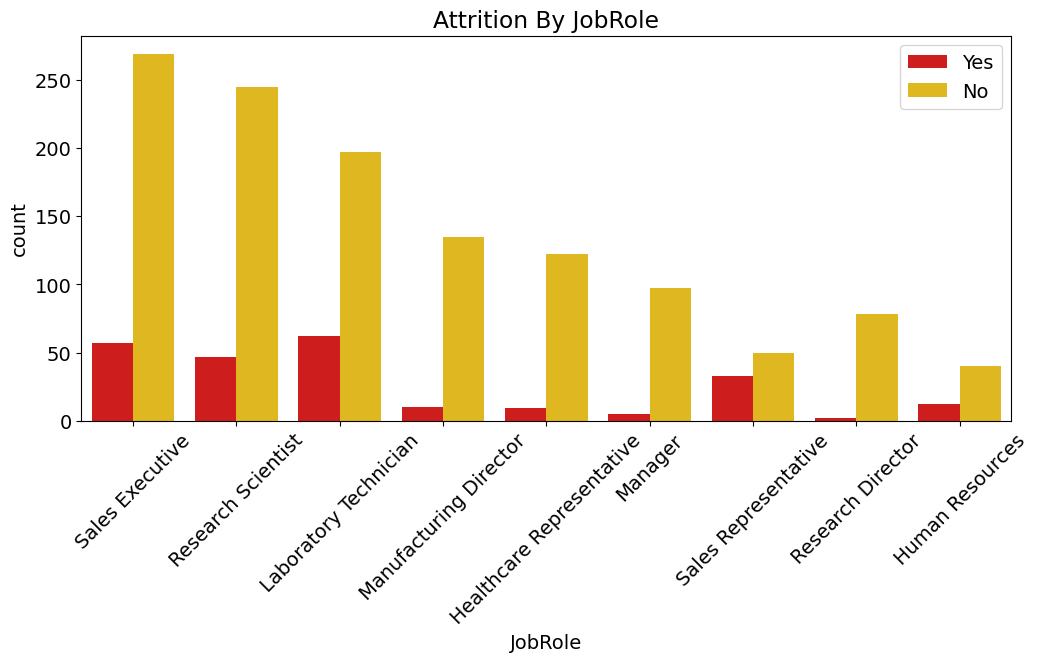

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(x='JobRole',hue='Attrition', data=df, palette='hot')
plt.title("Attrition By JobRole")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

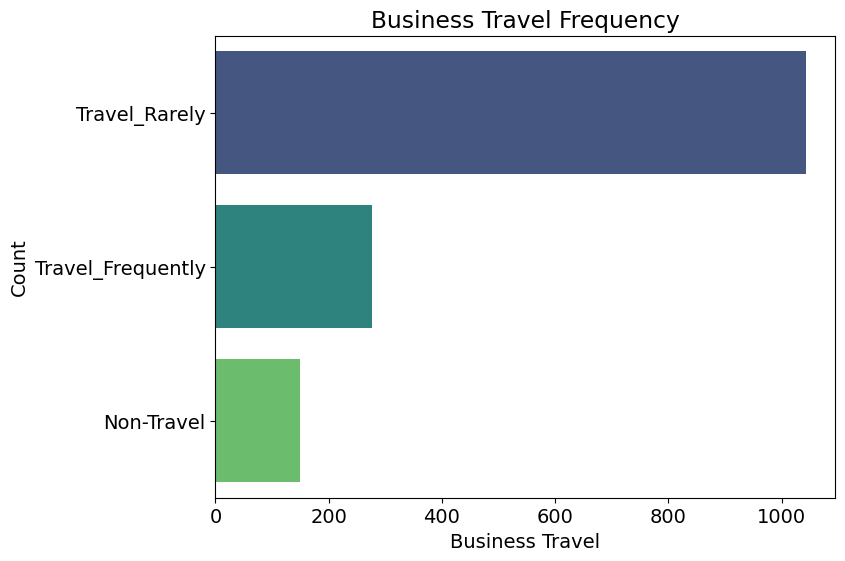

In [ ]:
# Mapping numerical codes to corresponding labels
travel_mapping = {0: 'Non-Travel', 1: 'Travel_Frequently', 2: 'Travel_Rarely'}
df['BusinessTravel'] = df['BusinessTravel'].replace(travel_mapping)

# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(df['BusinessTravel'], palette='viridis')
plt.title('Business Travel Frequency')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.show()


In [ ]:
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

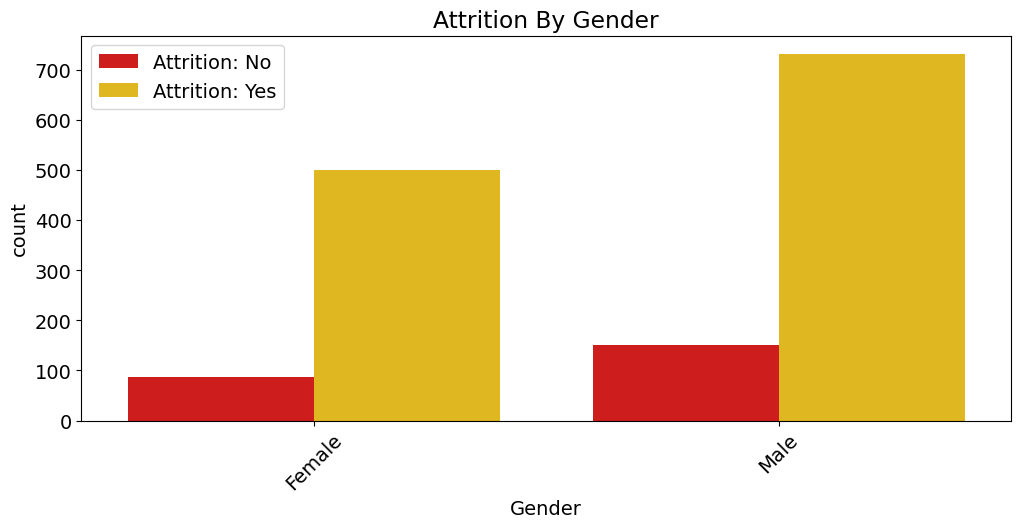

In [ ]:
# Mapping Attrition codes to corresponding labels
attrition_mapping = {0: 'No', 1: 'Yes'}
df['Attrition'] = df['Attrition'].replace(attrition_mapping)
# Plotting
plt.figure(figsize=(12, 5))
ax = sns.countplot(x='Gender', hue='Attrition', data=df, palette='hot')
# Setting legend labels
legend_labels = ['Attrition: No', 'Attrition: Yes']
ax.legend(labels=legend_labels, loc='best')
# Setting x-axis labels
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

plt.title("Attrition By Gender")
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.groupby(["Gender", "Attrition"]).agg({"Attrition": "count"})


Attrition
Gender Attrition           
Female No               501
       Yes               87
Male   No               732
       Yes              150

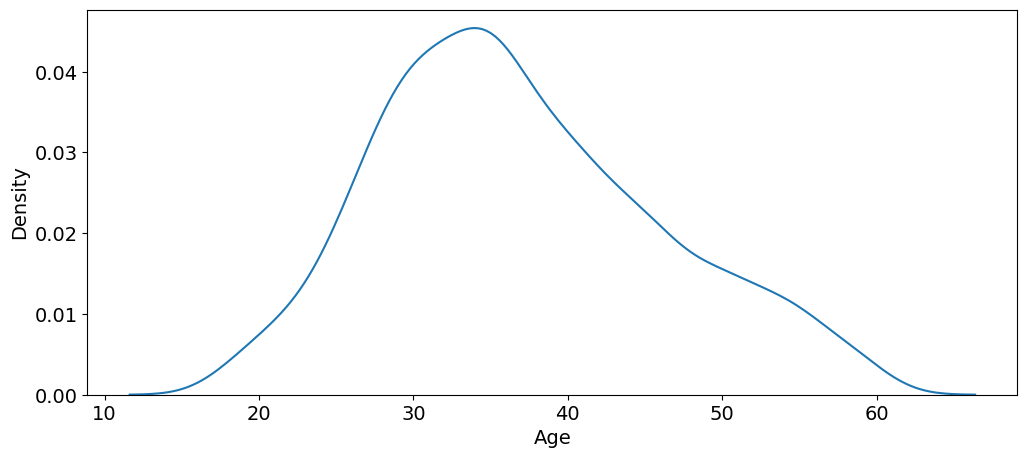

In [ ]:
# Distribution of Age
plt.figure(figsize=(12, 5))
sns.distplot(df['Age'], hist=False)
plt.show()


In [ ]:
ordinal_features=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
df[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


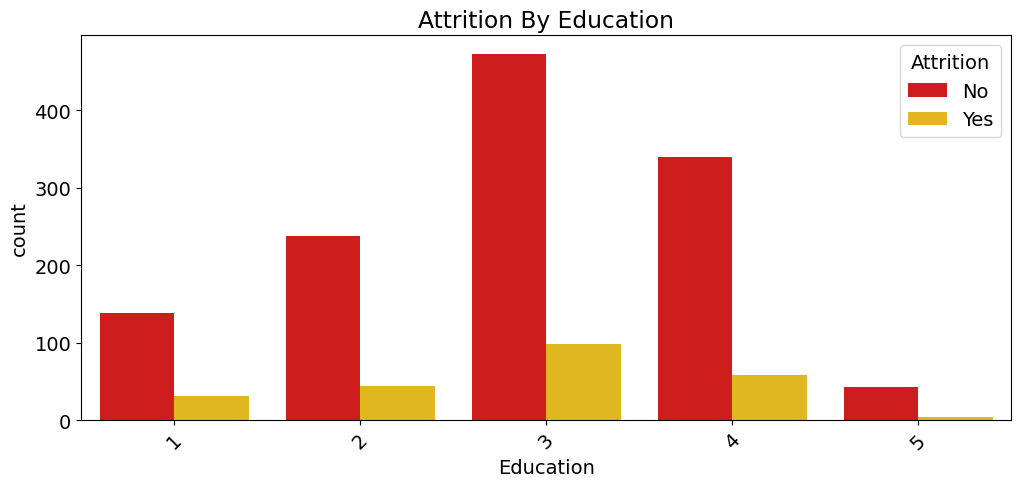

In [ ]:
edu_map = {1: 'High-School', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor'}

plt.figure(figsize=(12, 5))
sns.countplot(x=df['Education'], hue='Attrition', data=df.replace({'Education': edu_map}), palette='hot')
plt.title("Attrition By Education")
plt.xticks(rotation=45)
plt.show()


## Label Encoding

In [ ]:
#LABEL ENCODING.
#Machine does not understand text and can't predict text, hence the need to encode my dataset
#Target Variable (Attrition)
df['Attrition']=df['Attrition'].replace({'No':0,'Yes':1})
#Encoding Binary Features
df['OverTime']=df['OverTime'].replace({'No':0,'Yes':1})
df['Gender']=df['Gender'].replace({'Male':0,'Female':1})
df['Over18']=df['Over18'].replace({'Y':1,'No':0})


In [ ]:
#Encoding Categorical Columns that are ordinal
from sklearn.preprocessing import LabelEncoder
encoding_cols=['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
label_encoders={}
for column in encoding_cols:
    label_encoders[column]=LabelEncoder()
    df[column]=label_encoders[column].fit_transform(df[column])


In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   BusinessTravel            1470 non-null   int64
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int64
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int64
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   int64
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null 

## Input and Output Features


In [ ]:
#Splitting data into Training and Testing Samples
X=df.drop(['Attrition'],axis=1) #input feature
y=df['Attrition'].values #output feature


In [ ]:
X.shape

(1470, 34)

In [ ]:
y.shape

(1470,)

In [ ]:
#Resampling Dataset because of imbalance
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
print(Counter(y))
rus=RandomOverSampler(random_state=42)
X_over,y_over=rus.fit_resample(X,y)
print(Counter(y_over))

Counter({0: 1233, 1: 237})
Counter({1: 1233, 0: 1233})


## Data Splitting

In [ ]:
#Splitting Dataset into learning and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_over,y_over,test_size=0.2,random_state=42)

In [ ]:
#Sanity Check for the sampled dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1972, 34)
(1972,)
(494, 34)
(494,)


# **Model Building**

##Logistic Regression

In [ ]:
#Using Logistic Regression a Classification Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score, ConfusionMatrixDisplay

In [ ]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
prediction=logreg.predict(X_test)
cnf_matrix=confusion_matrix(y_test,prediction)
print("Accuracy Score:", accuracy_score(y_test,prediction))

Accuracy Score: 0.6417004048582996


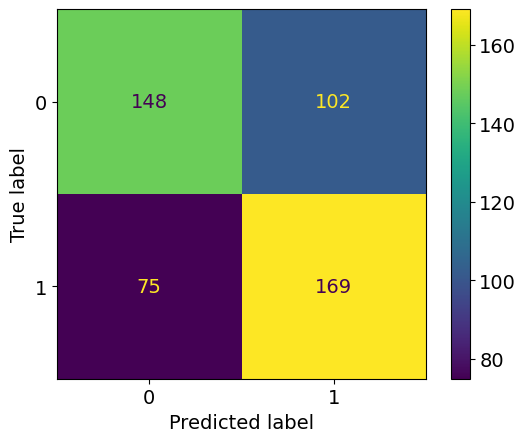

In [ ]:
display = ConfusionMatrixDisplay(cnf_matrix)
display.plot()
plt.show()


## Random Forest


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# X_train.shape, y_train.shape

In [ ]:
# X_test.shape, y_test.shape

In [ ]:
rfcl = RandomForestClassifier()
rfcl.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
prediction=rfcl.predict(X_test)
cnf_matrixx=confusion_matrix(y_test,prediction)
print("Accuracy Score:", accuracy_score(y_test,prediction))

Accuracy Score: 0.9574898785425101


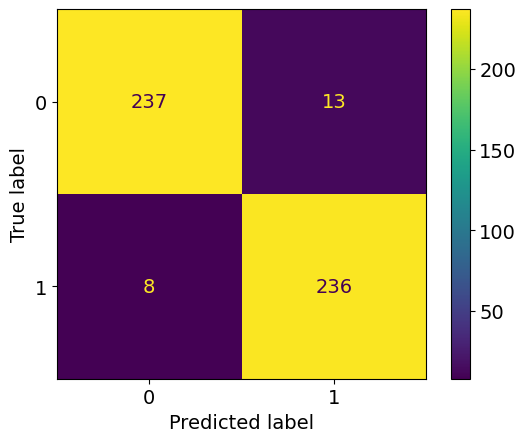

In [ ]:
display = ConfusionMatrixDisplay(cnf_matrixx)
display.plot()
plt.show()

## Decision Tree Classifier

In [ ]:
from sklearn import tree
dtclf = tree.DecisionTreeClassifier(max_depth=5, random_state=42)
dtclf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
prediction=dtclf.predict(X_test)
cnf_matrix=confusion_matrix(y_test,prediction)
print("Accuracy Score:", accuracy_score(y_test,prediction))

Accuracy Score: 0.7651821862348178


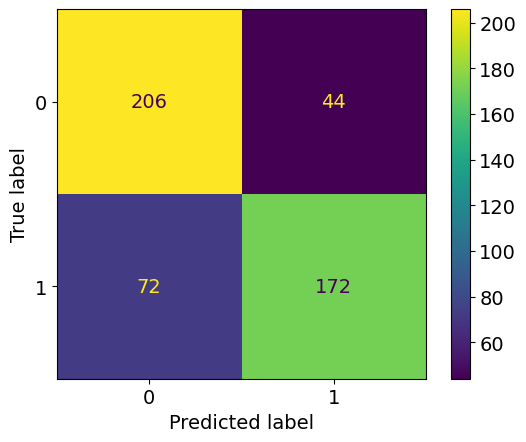

In [ ]:
display = ConfusionMatrixDisplay(cnf_matrix)
display.plot()
plt.show()

## Gradient Boosting

In [ ]:
gbclf = GradientBoostingClassifier(random_state = 42)
gbclf.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
prediction=gbclf.predict(X_test)
cnf_matrix=confusion_matrix(y_test,prediction)
print("Accuracy Score:", accuracy_score(y_test,prediction))

Accuracy Score: 0.8623481781376519


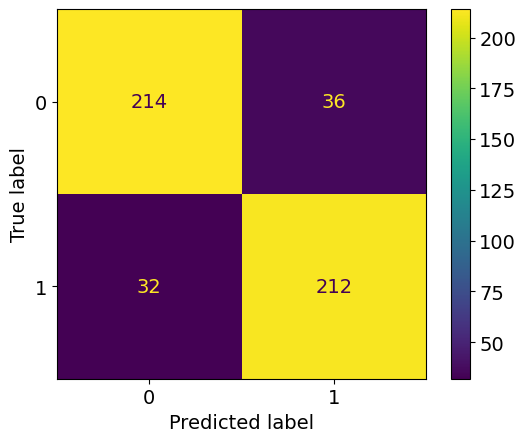

In [ ]:
display = ConfusionMatrixDisplay(cnf_matrix)
display.plot()
plt.show()

**Tuning Gradient Boosting Classifier**

In [ ]:
gbclf = GradientBoostingClassifier(n_estimators=60, random_state = 42)
gbclf.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=60, random_state=42)

In [ ]:
prediction=gbclf.predict(X_test)
cnf_matrix=confusion_matrix(y_test,prediction)
print("Accuracy Score:", accuracy_score(y_test,prediction))

Accuracy Score: 0.8238866396761133


## K-Nearest Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnclf = KNeighborsClassifier(n_neighbors=3)
knnclf.fit(X_train, y_train)
knnclf.score(X_test, y_test)



0.7975708502024291

##SVM Classifier

In [ ]:
from sklearn.svm import SVC
svclf = SVC(probability=True)
svclf.fit(X_train, y_train)
svclf.score(X_test, y_test)

0.597165991902834

In [ ]:
# logreg.predict_proba(X_test)[:5]

In [ ]:
# logreg.predict_proba(X_test)[:, 1]

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


ATTRITION PREDICTION

In [ ]:
attrition_prediction = gbclf.predict(df.drop(columns="Attrition"))

In [ ]:
df["Predicted_Attrition"] = attrition_prediction

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Predicted_Attrition
0,41,1,2,1102,2,1,2,1,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,0,1,279,1,8,1,1,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,1,2,1373,1,2,2,4,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,0,1,1392,1,3,4,1,1,5,...,80,0,8,3,3,8,7,3,0,1
4,27,0,2,591,1,2,1,3,1,7,...,80,1,6,3,3,2,2,2,2,0


NUMBER OF EMPLOYEES RETAINED

In [ ]:
df["Predicted_Attrition"].value_counts()[0]

1146

NUMBER OF EMPLOYEES DROPPED

In [ ]:
df["Predicted_Attrition"].value_counts()[1]

324

In [ ]:
df.to_csv('/content/Attrition Prediction Output new.csv', sep='\t')
